In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [26]:
class MyDBSCAN:
    def __init__(self, eps = 3, min_samples = 3, metric = "euclidean"):
        self.eps = eps
        self.min_samples = min_samples
        self.visited = None
        self.labels = None
        self.metric = metric
    def __repr__(self):
        return f"MyDBSCAN class: eps={self.eps}, min_samples={self.min_samples}"
    def _region_query(self, point_idx, X):
        point = X[point_idx]
        if self.metric == "euclidean":
            dists = np.linalg.norm(X - point, axis = 1)
        elif self.metric == "manhattan":
            dists = np.sum(np.abs(X-point), axis = 1)
        elif self.metric == "chebyshev":
            dists = np.max(np.abs(X-point), axis = 1)
        elif self.metric == "cosine":
            numerator = X @ point
            denominator = np.linalg.norm(X, axis = 1) * np.linalg.norm(point)
            dists =  1 - numerator/denominator
        else:
            raise ValueError("Неправильное название метрики!")
        return np.where(dists <= self.eps)[0]
        
    def _expand_cluster(self, p, neighbors, cluster_id, X):
        neighbors = list(neighbors)
        self.labels[p] = cluster_id
        i = 0
        while i < len(neighbors):
            q = neighbors[i]
            if not self.visited[q]:
                self.visited[q] = True
                q_neighbors = self._region_query(q, X)
                if len(q_neighbors) >= self.min_samples+1:
                    for qn in q_neighbors:
                        if qn not in neighbors:
                            neighbors.append(qn)
            if self.labels[q] == -10:
                self.labels[q] = cluster_id
            i += 1
    def fit_predict(self, X):
        if isinstance(X, pd.DataFrame):
            X_array = X.to_numpy()
        else:
             X_array = np.asarray(X)
        n_samples = X_array.shape[0]
        self.visited = [False] * n_samples
        self.labels = [-10] * n_samples
        cluster_id = -1
        for i in range(n_samples):
            if self.visited[i]:
                continue
            self.visited[i] = True
            neighbors = self._region_query(i, X_array)
            if len(neighbors) >= self.min_samples+1:
                cluster_id += 1
                self._expand_cluster(i, neighbors, cluster_id, X_array)
            else:
                self.labels[i] = -10
        return self.labels
        

In [22]:
from sklearn import datasets
from sklearn.datasets import make_moons, make_blobs, make_circles

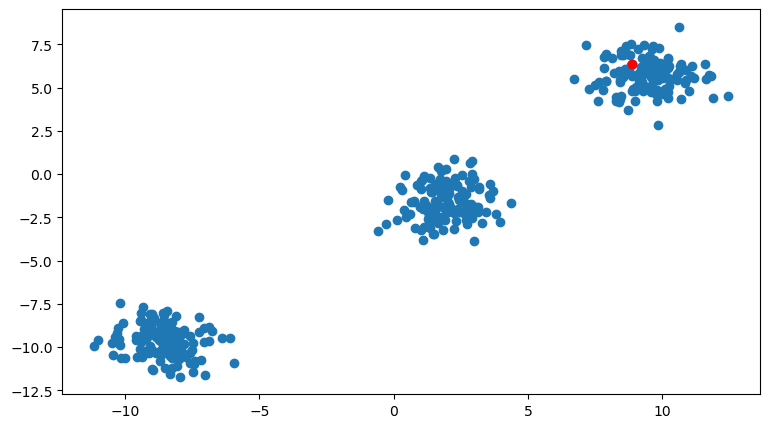

In [23]:
X_blobs, y_blobs = make_blobs(n_samples=400, n_features = 6, random_state=0)
X = pd.DataFrame(X_blobs)
X.columns = [f'col_{col}' for col in X.columns]
plt.figure(figsize = (9,5))
plt.scatter(X['col_2'], X['col_4']);
plt.scatter(X.loc[0, 'col_2'], X.loc[0, 'col_4'], c = 'r');

In [24]:
model = MyDBSCAN(eps = 3, min_samples = 3, metric = "euclidean")
prediction = model.fit_predict(X_blobs)
prediction = np.array(prediction)
print(prediction)

[0 1 0 0 1 1 2 0 1 1 2 0 2 2 0 1 2 1 2 1 2 1 2 1 2 1 0 1 0 0 1 0 1 1 1 0 0
 1 1 0 1 1 2 2 0 0 1 0 2 2 2 1 0 0 1 0 0 2 2 0 0 1 2 0 2 2 1 1 1 1 0 0 1 1
 1 0 1 0 2 0 1 0 2 2 1 2 0 1 1 0 1 2 1 1 1 2 0 2 2 2 1 2 1 2 1 1 2 0 1 1 1
 0 2 2 2 0 2 1 2 2 1 1 1 1 1 2 1 0 2 0 1 2 1 0 1 0 0 1 1 2 2 1 0 2 2 0 1 1
 1 0 2 0 2 2 0 1 2 2 1 0 2 2 1 1 0 2 1 0 1 0 2 2 0 2 2 0 1 0 0 2 2 1 2 1 0
 2 1 0 2 2 1 0 1 2 0 2 2 0 2 1 2 0 2 1 1 2 2 2 0 1 1 0 1 2 1 2 2 0 2 1 0 1
 2 2 1 0 1 2 0 0 1 2 2 2 1 2 0 0 0 0 2 0 2 2 1 2 1 2 2 1 2 2 1 2 2 2 0 2 0
 0 2 0 0 0 1 0 2 1 2 2 2 0 1 2 1 0 1 2 1 0 1 0 2 0 1 0 0 0 1 2 1 0 1 0 2 0
 0 1 1 0 0 1 0 1 2 1 1 0 0 0 2 0 0 0 0 1 1 2 2 2 0 2 2 0 2 1 0 0 0 2 2 1 1
 0 1 1 1 0 0 2 2 1 0 1 1 0 2 0 0 2 0 0 1 0 0 0 1 1 2 0 2 0 2 0 2 2 2 1 0 1
 1 0 1 2 0 2 0 0 1 0 1 2 1 1 0 2 2 0 2 1 1 2 2 0 1 0 0 0 0 2]


In [25]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 3, min_samples = 3)
sklearn_prediction = dbscan.fit_predict(X_blobs)
print(sklearn_prediction)

[0 1 0 0 1 1 2 0 1 1 2 0 2 2 0 1 2 1 2 1 2 1 2 1 2 1 0 1 0 0 1 0 1 1 1 0 0
 1 1 0 1 1 2 2 0 0 1 0 2 2 2 1 0 0 1 0 0 2 2 0 0 1 2 0 2 2 1 1 1 1 0 0 1 1
 1 0 1 0 2 0 1 0 2 2 1 2 0 1 1 0 1 2 1 1 1 2 0 2 2 2 1 2 1 2 1 1 2 0 1 1 1
 0 2 2 2 0 2 1 2 2 1 1 1 1 1 2 1 0 2 0 1 2 1 0 1 0 0 1 1 2 2 1 0 2 2 0 1 1
 1 0 2 0 2 2 0 1 2 2 1 0 2 2 1 1 0 2 1 0 1 0 2 2 0 2 2 0 1 0 0 2 2 1 2 1 0
 2 1 0 2 2 1 0 1 2 0 2 2 0 2 1 2 0 2 1 1 2 2 2 0 1 1 0 1 2 1 2 2 0 2 1 0 1
 2 2 1 0 1 2 0 0 1 2 2 2 1 2 0 0 0 0 2 0 2 2 1 2 1 2 2 1 2 2 1 2 2 2 0 2 0
 0 2 0 0 0 1 0 2 1 2 2 2 0 1 2 1 0 1 2 1 0 1 0 2 0 1 0 0 0 1 2 1 0 1 0 2 0
 0 1 1 0 0 1 0 1 2 1 1 0 0 0 2 0 0 0 0 1 1 2 2 2 0 2 2 0 2 1 0 0 0 2 2 1 1
 0 1 1 1 0 0 2 2 1 0 1 1 0 2 0 0 2 0 0 1 0 0 0 1 1 2 0 2 0 2 0 2 2 2 1 0 1
 1 0 1 2 0 2 0 0 1 0 1 2 1 1 0 2 2 0 2 1 1 2 2 0 1 0 0 0 0 2]
